Nombre: Pablo César Méndez Rodas                               
Carnet: 22006487            
Text Mining & Image Recognition, sección L                  
PAPD - Tercer trimestre 2023

# LABORATORIO #1

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Problema 1

In [16]:
def imagen_canal(imagen, color):
    if color not in [1,2,3,10,20,30]:
        raise ValueError("El código de color debe ser 1,2,3,10,20,30")
 
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

    alto = imagen.shape[0]
    ancho = imagen.shape[1]

    monocromo = np.zeros((alto,ancho,3))

    for i in range (0,alto):
        for j in range(0,ancho):
            pixel = imagen[i,j]

            #Extraemos canales
            red = pixel[0]
            green = pixel [1]
            blue = pixel [2]

            if color == 1:
                monocromo[i,j] = [blue,0,0]
            elif color == 2:
                monocromo[i,j] = [0,green,0]
            elif color == 3:
                monocromo[i,j] = [0,0,red]
            elif color == 10:
                monocromo[i,j] = [0,green,red]
            elif color == 20:
                monocromo[i,j] = [blue,green,0]
            elif color == 30:
                monocromo[i,j] = [blue,0,red]
    return monocromo


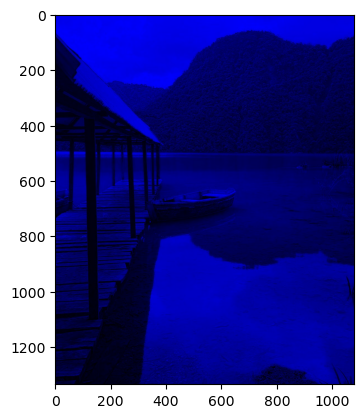

In [21]:
img = cv2.imread("laguna.jpeg")
cod = int(input('Ingrese el código del color: '))

img_canal = imagen_canal(img,cod)

nombre_img= f"laguna_cod{cod}.jpg"
cv2.imwrite(nombre_img,img_canal)
img_canal = cv2.imread(nombre_img)
img_canal = cv2.cvtColor(img_canal, cv2.COLOR_BGR2RGB)
plt.imshow(img_canal)
plt.show()

## Problema 2

In [44]:
def construir_color(imagen_r, imagen_g, imagen_b):

    alto = imagen_r.shape[0]
    ancho = imagen_r.shape[1]

    monocromo = np.zeros((alto,ancho,3))

    for i in range (0,alto):
        for j in range(0,ancho):
            pixel_r = imagen_r[i,j]
            pixel_g = imagen_g[i,j]
            pixel_b = imagen_b[i,j]

            #Extraemos canales
            red = pixel_r[0]
            green = pixel_g [0]
            blue = pixel_b [0]

            monocromo[i,j] = [blue,green,red]

    return monocromo


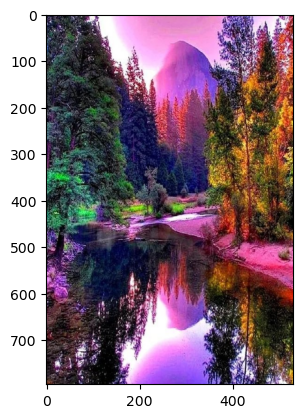

In [46]:
img_r = cv2.imread("imagen2/imagen2_salida_gray_rojo.jpg")
img_g = cv2.imread("imagen2/imagen2_salida_gray_verde.jpg")
img_b = cv2.imread("imagen2/imagen2_salida_gray_azul.jpg")

imagen_color = construir_color(img_r, img_g, img_b)

cv2.imwrite("imagen2/imagen 2 a color.jpg",imagen_color)
imagen_color = cv2.imread("imagen2/imagen 2 a color.jpg")
imagen_color = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB)
plt.imshow(imagen_color)
plt.show()


## Problema 3

In [48]:
def construir_gris(imagen):
 
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

    alto = imagen.shape[0]
    ancho = imagen.shape[1]

    gris_r = np.zeros((alto,ancho,1))
    gris_g = np.zeros((alto,ancho,1))
    gris_b = np.zeros((alto,ancho,1))

    for i in range (0,alto):
        for j in range(0,ancho):
            pixel = imagen[i,j]

            #Extraemos canales
            red = pixel[0]
            green = pixel [1]
            blue = pixel [2]

            gris_r[i,j] = red
            gris_g[i,j] = green
            gris_b[i,j] = blue


    return gris_r,gris_g,gris_b

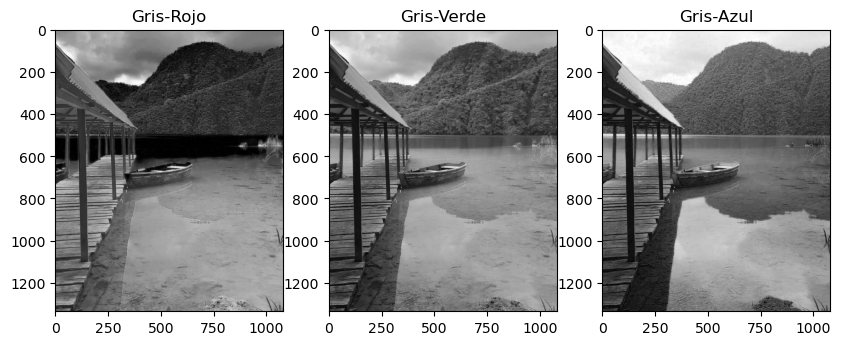

In [51]:
img = cv2.imread("laguna.jpeg")

img_gris_r,img_gris_g,img_gris_b = construir_gris(img)

cv2.imwrite("laguna gris_r.jpg",img_gris_r)
cv2.imwrite("laguna gris_g.jpg",img_gris_g)
cv2.imwrite("laguna gris_b.jpg",img_gris_b)
img_gris_r = cv2.imread("laguna gris_r.jpg")
img_gris_g = cv2.imread("laguna gris_g.jpg")
img_gris_b = cv2.imread("laguna gris_b.jpg")

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_gris_r)
plt.title("Gris-Rojo")

plt.subplot(1, 3, 2)
plt.imshow(img_gris_g)
plt.title("Gris-Verde")

plt.subplot(1, 3, 3)
plt.imshow(img_gris_b)
plt.title("Gris-Azul")

plt.show()